In [2]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rc 

In [3]:
def print_network_graph(ssoln_dict:dict, eps:float=0.0, norm_factor:float=1.0):
    G = nx.DiGraph()
    
    
    # ssoln_dict = iter_ssoln_dict[1]
    nodes = {
    'Location 1': {
        'Capacity': ssoln_dict['Cap_P[loc1,com1_process,0]']/norm_factor if 'Cap_P[loc1,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc1,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc1,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 2': {
        'Capacity': ssoln_dict['Cap_P[loc2,com1_process,0]']/norm_factor if 'Cap_P[loc2,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc2,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc2,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 3': {
        'Capacity': ssoln_dict['Cap_P[loc3,com1_process,0]']/norm_factor if 'Cap_P[loc3,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc3,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc3,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 4': {
        'Capacity': ssoln_dict['Cap_P[loc4,com1_process,0]']/norm_factor if 'Cap_P[loc4,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc4,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc4,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 5': {
        'Capacity': ssoln_dict['Cap_P[loc5,com1_process,0]']/norm_factor if 'Cap_P[loc5,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc5,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc5,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 6': {
        'Capacity': ssoln_dict['Cap_P[loc6,com1_process,0]']/norm_factor if 'Cap_P[loc6,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc6,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc6,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    'Location 7': {
        'Capacity': ssoln_dict['Cap_P[loc7,com1_process,0]']/norm_factor if 'Cap_P[loc7,com1_process,0]' in ssoln_dict.keys() else 0,
        'Inventory': ssoln_dict['Cap_S[loc7,com1_store_com1_in_stored,0]']/norm_factor if 'Cap_S[loc7,com1_store_com1_in_stored,0]' in ssoln_dict.keys() else 0
    },
    }
    
    # Add nodes to the graph
    G.add_nodes_from(nodes.keys())
    
    # Define edges (connections between nodes)
    edges = [
        ('Location 1', 'Location 2', {'weight': ssoln_dict['Cap_F[loc1,loc2,truck12,0]']/norm_factor if 'Cap_F[loc1,loc2,truck12,0]' in ssoln_dict.keys() else 0}),
        ('Location 1', 'Location 3', {'weight': ssoln_dict['Cap_F[loc1,loc3,truck13,0]']/norm_factor if 'Cap_F[loc1,loc3,truck13,0]' in ssoln_dict.keys() else 0}),
        ('Location 1', 'Location 5', {'weight': ssoln_dict['Cap_F[loc1,loc5,plane15,0]']/norm_factor if 'Cap_F[loc1,loc5,plane15,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 4', {'weight': ssoln_dict['Cap_F[loc2,loc4,truck24,0]']/norm_factor if 'Cap_F[loc2,loc4,truck24,0]' in ssoln_dict.keys() else 0}),
        ('Location 2', 'Location 5', {'weight': ssoln_dict['Cap_F[loc2,loc5,truck25,0]']/norm_factor if 'Cap_F[loc2,loc5,truck25,0]' in ssoln_dict.keys() else 0}),
        ('Location 3', 'Location 4', {'weight': ssoln_dict['Cap_F[loc3,loc4,truck34,0]']/norm_factor if 'Cap_F[loc3,loc4,truck34,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 5', {'weight': ssoln_dict['Cap_F[loc4,loc5,truck45,0]']/norm_factor if 'Cap_F[loc4,loc5,truck45,0]' in ssoln_dict.keys() else 0}),
        ('Location 4', 'Location 7', {'weight': ssoln_dict['Cap_F[loc4,loc7,truck47,0]']/norm_factor if 'Cap_F[loc4,loc7,truck47,0]' in ssoln_dict.keys() else 0}),
        ('Location 6', 'Location 4', {'weight': ssoln_dict['Cap_F[loc6,loc4,truck64,0]']/norm_factor if 'Cap_F[loc6,loc4,truck64,0]' in ssoln_dict.keys() else 0}),
        # ('Location 6', 'Location 5', {'weight': ssoln_dict['Cap_F[loc6,loc5,plane65,0]'] if 'Cap_F[loc6,loc5,plane65,0]' in ssoln_dict.keys() else 0}),
        ('Location 7', 'Location 5', {'weight': ssoln_dict['Cap_F[loc7,loc5,truck75,0]']/norm_factor if 'Cap_F[loc7,loc5,truck75,0]' in ssoln_dict.keys() else 0}),
    ]
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Define fixed positions for nodes
    fixed_positions = {
        'Location 1': (-2, 2),
        'Location 2': (0, 2),
        'Location 3': (-2, 0),
        'Location 4': (0, 0),
        'Location 5': (2, 0),
        'Location 6': (-2, -2),
        'Location 7': (1, -2)
    }
    
    # Create custom labels combining multiple pieces of information
    node_labels = {node: f"Capacity: {data['Capacity']:.2f}\nInventory: {data['Inventory']:.2f}" for node, data in nodes.items()}
    
    # Draw nodes and edges with fixed positions
    nx.draw_networkx_nodes(G, fixed_positions, node_color='skyblue', node_size=700)
    nx.draw_networkx_edges(G, fixed_positions, edgelist=edges, arrowstyle='simple', arrowsize=15)
    nx.draw_networkx_labels(G, fixed_positions, labels=node_labels, font_size=8, font_color='red', bbox=dict(facecolor="white", edgecolor="none", alpha=0.7, boxstyle="round,pad=0.3"))
    
    # Draw edge labels (optional)
    edge_labels = {(u, v): round(d['weight'],3) for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, fixed_positions, edge_labels=edge_labels, label_pos=0.4, font_size=8)
    
    # Expand plot limits to prevent cutoff
    x_values, y_values = zip(*fixed_positions.values())
    plt.xlim(min(x_values) - 1, max(x_values) + 1)
    plt.ylim(min(y_values) - 1, max(y_values) + 1)
    
    # Show the plot
    plt.title(f"Supply Chain Network considering fill rate of {eps}")
    # plt.figure(figsize=(16,12))
    plt.show()  

In [4]:
eps = 0.1

In [5]:
with open(f'HPRC_results/RR_{eps}_final_results_dict.pkl', 'rb') as file:
    s = pickle.load(file)
s

{4096: {'Expected Cost UI': 532992.5504312555,
  'First Stage Cost': 23416.000000000004,
  'Execution Time': 3762.6345705986023}}

In [6]:
with open(f'HPRC_results/RR_{eps}_iter_ssoln_dict.pkl', 'rb') as file:
    load = pickle.load(file)

load[list(load.keys())[-1]]

{1: {'X_P[loc1,com1_loc1_send,0]': 1.0,
  'X_P[loc1,com1_loc2_send,0]': None,
  'X_P[loc1,com1_loc3_send,0]': None,
  'X_P[loc1,com1_loc4_send,0]': None,
  'X_P[loc1,com1_loc5_send,0]': None,
  'X_P[loc1,com1_loc6_send,0]': None,
  'X_P[loc1,com1_loc7_send,0]': None,
  'X_P[loc1,com1_process,0]': 1.0,
  'X_P[loc1,com1_receive_loc1,0]': None,
  'X_P[loc1,com1_receive_loc2,0]': 0.0,
  'X_P[loc1,com1_receive_loc3,0]': 0.0,
  'X_P[loc1,com1_receive_loc4,0]': None,
  'X_P[loc1,com1_receive_loc5,0]': None,
  'X_P[loc1,com1_receive_loc6,0]': None,
  'X_P[loc1,com1_receive_loc7,0]': None,
  'X_P[loc1,com1_store,0]': 1.0,
  'X_P[loc1,com1_store_discharge,0]': 1.0,
  'X_P[loc1,procure com1,0]': 1.0,
  'X_P[loc1,sell com1,0]': None,
  'X_P[loc2,com1_loc1_send,0]': None,
  'X_P[loc2,com1_loc2_send,0]': 1.0,
  'X_P[loc2,com1_loc3_send,0]': None,
  'X_P[loc2,com1_loc4_send,0]': None,
  'X_P[loc2,com1_loc5_send,0]': None,
  'X_P[loc2,com1_loc6_send,0]': None,
  'X_P[loc2,com1_loc7_send,0]': None,
  '

In [7]:
load[eps][list(load[eps].keys())[-1]]['Cap_P[loc1,procure com1,0]']/91

133.33333333333334

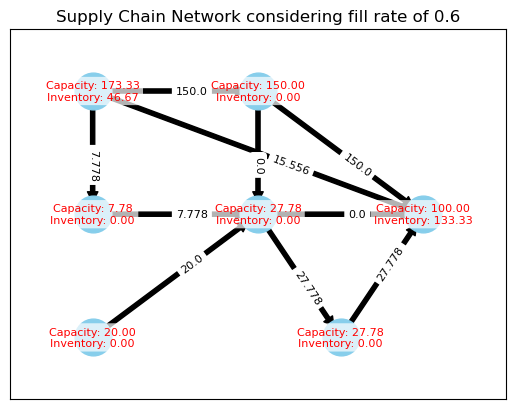

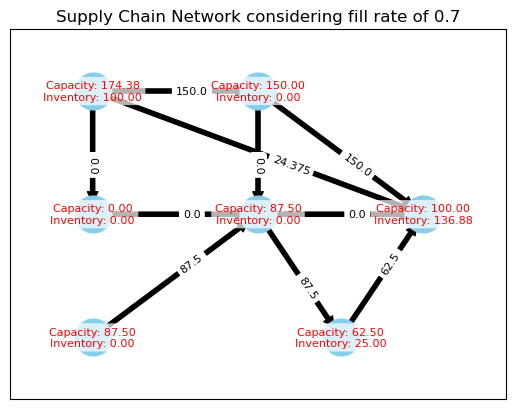

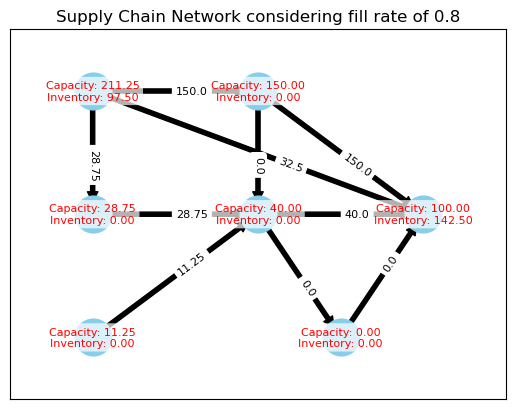

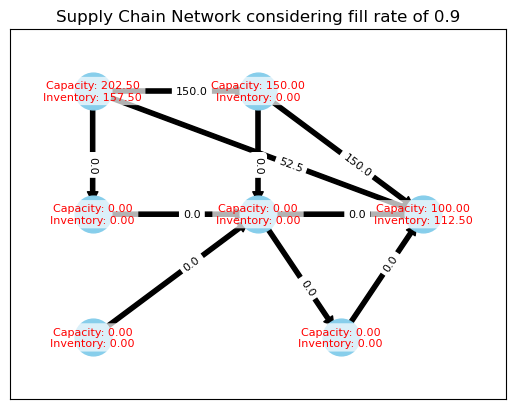

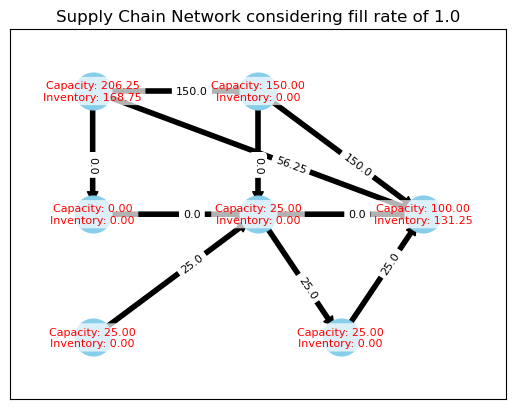

In [8]:
for eps in [0.6, 0.7, 0.8, 0.9, 1.0]:
    with open(f'HPRC_results/RR_{eps}_iter_ssoln_dict.pkl', 'rb') as file:
        load_ssoln = pickle.load(file)
    ssoln = load_ssoln[eps][list(load_ssoln[eps].keys())[-1]]
    print_network_graph(ssoln_dict=ssoln, eps=eps, norm_factor=91)

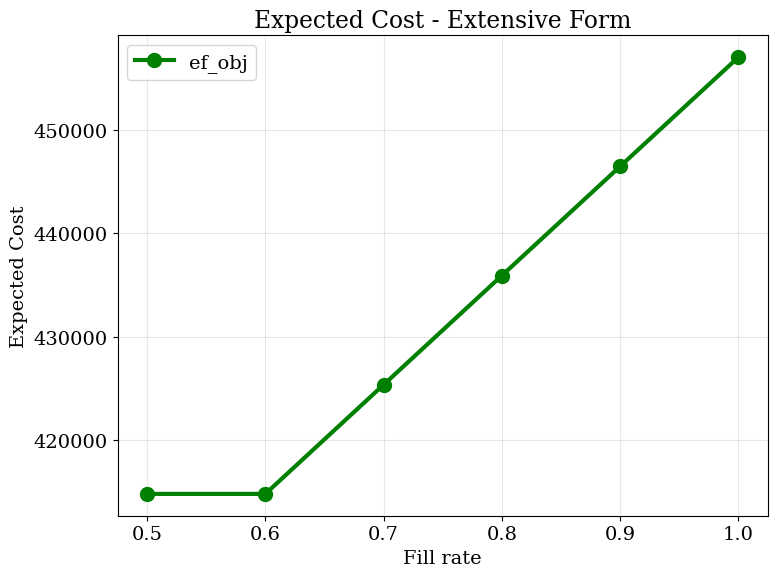

In [17]:
rc('font', **{'family': 'serif', 'size': 14})

fig, ax = plt.subplots(figsize = (8, 6))
# ax1 = ax.twinx()

# Example data
x = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = [414840.2028, 414840.2028, 425383.94, 435927.6931, 446471.4384, 457015.1836]
y2 = [25594, 25594, 29495, 3396, 37297, 41198]
# Plotting
ax.plot(x, y, marker='o', label='ef_obj', color = 'green', linewidth=3, markersize=10)  # 'o' adds circular markers at data points
# ax1.plot(x, y2, marker='x', label='approx_obj', color ='blue')
plt.title('Expected Cost - Extensive Form')
ax.set_ylabel('Expected Cost')
# ax1.set_ylabel('Expected Cost (Approx.)')
ax.set_xlabel('Fill rate')
plt.grid(alpha = 0.3)
# ax1.legend(loc='lower right')
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fname = 'pareto_ef', dpi = 300)
plt.show()
plt.rcdefaults()

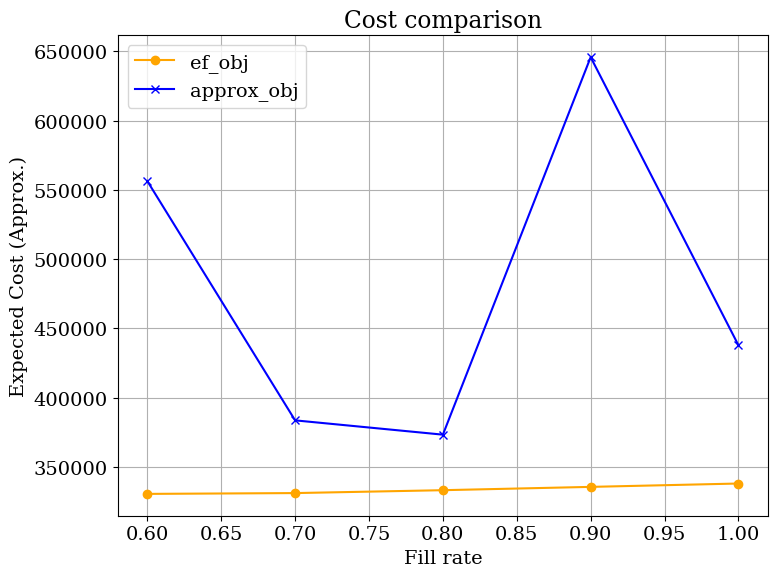

In [10]:
rc('font', **{'family': 'serif', 'size': 14})

fig, ax = plt.subplots(figsize = (8, 6))
ax1 = ax

# Example data
x = [0.6, 0.7, 0.8, 0.9, 1.0]
y = [330454.42, 331037.73, 333120.44, 335512.42, 337938.97]
y2 = [556280.48, 383540.86, 373214.82, 645751.8, 437765.47]
# Plotting
ax.plot(x, y, marker='o', label='ef_obj', color = 'orange')  # 'o' adds circular markers at data points
ax1.plot(x, y2, marker='x', label='approx_obj', color ='blue')
plt.title('Cost comparison')
ax.set_ylabel('Expected Cost (Extensive)')
ax1.set_ylabel('Expected Cost (Approx.)')
ax.set_xlabel('Fill rate')
plt.grid(True)
ax1.legend(loc='lower right')
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fname = 'ccomp2', dpi = 300)
plt.show()
plt.rcdefaults()

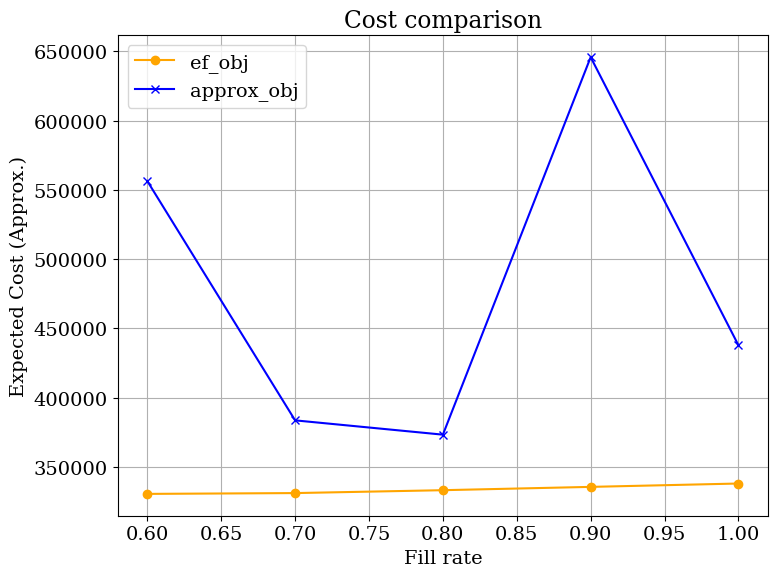

In [11]:
rc('font', **{'family': 'serif', 'size': 14})

fig, ax = plt.subplots(figsize = (8, 6))
ax1 = ax

# Example data
x = [0.6, 0.7, 0.8, 0.9, 1.0]
y = [330454.42, 331037.73, 333120.44, 335512.42, 337938.97]
y2 = [556280.48, 383540.86, 373214.82, 645751.8, 437765.47]
# Plotting
ax.plot(x, y, marker='o', label='ef_obj', color = 'orange')  # 'o' adds circular markers at data points
ax1.plot(x, y2, marker='x', label='approx_obj', color ='blue')
plt.title('Cost comparison')
ax.set_ylabel('Expected Cost (Extensive)')
ax1.set_ylabel('Expected Cost (Approx.)')
ax.set_xlabel('Fill rate')
plt.grid(True)
ax1.legend(loc='lower right')
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fname = 'ccomp2', dpi = 300)
plt.show()
plt.rcdefaults()

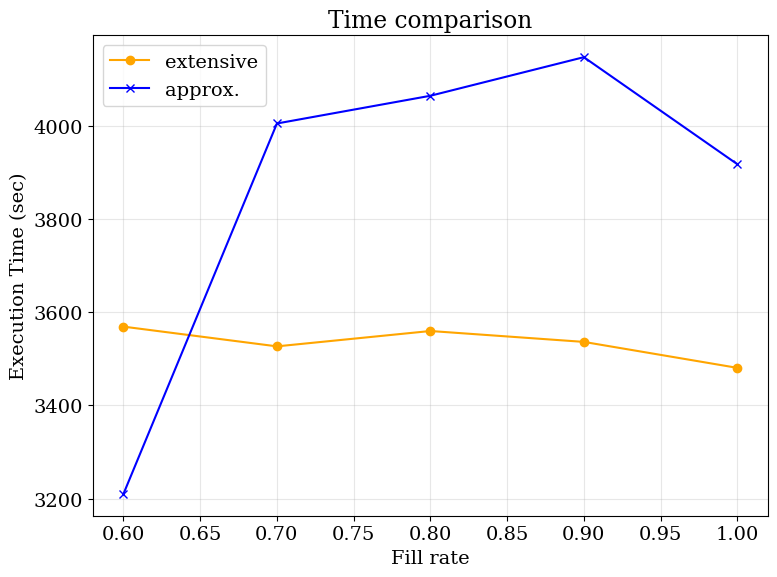

In [12]:
rc('font', **{'family': 'serif', 'size': 14})

fig, ax = plt.subplots(figsize = (8, 6))

# Example data
x = [0.6, 0.7, 0.8, 0.9, 1.0]
y = [3568.96, 3526.67, 3559.59, 3536.24, 3480.61]
y2 = [3210.4423, 4004.41, 4063.84, 4146.57, 3917.15]
# Plotting
ax.plot(x, y, marker='o', label='extensive', color = 'orange')  # 'o' adds circular markers at data points
ax.plot(x, y2, marker='x', label='approx.', color ='blue')
plt.title('Time comparison')
plt.ylabel('Execution Time (sec)')
plt.xlabel('Fill rate')
plt.grid(alpha = 0.3)
ax1.legend(loc='lower right')
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fname = 'ccomp3', dpi = 300)
plt.show()
plt.rcdefaults()

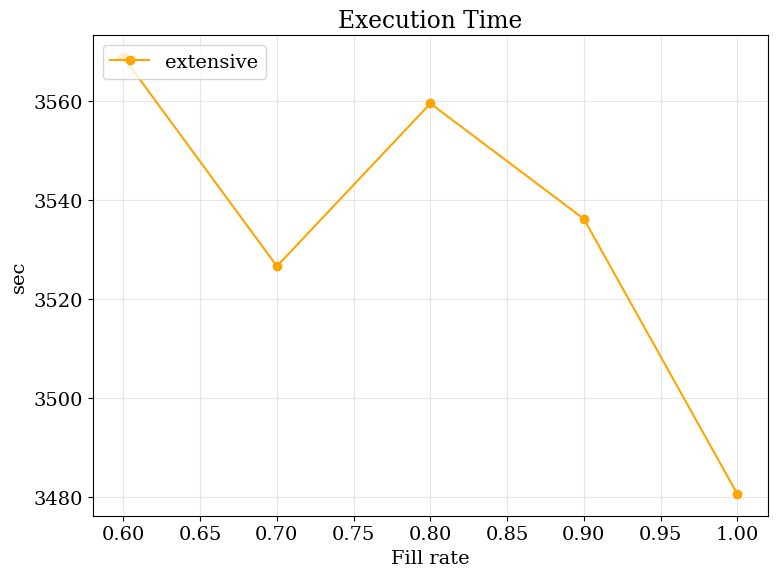

In [13]:
rc('font', **{'family': 'serif', 'size': 14})

fig, ax = plt.subplots(figsize = (8, 6))

# Example data
x = [0.6, 0.7, 0.8, 0.9, 1.0]
y = [3568.96, 3526.67, 3559.59, 3536.24, 3480.61]
y2 = [3210.4423, 4004.41, 4063.84, 4146.57, 3917.15]
# Plotting
ax.plot(x, y, marker='o', label='extensive', color = 'orange')  # 'o' adds circular markers at data points
# ax.plot(x, y2, marker='x', label='approx.', color ='blue')
plt.title('Execution Time')
plt.ylabel('sec')
plt.xlabel('Fill rate')
plt.grid(alpha = 0.3)
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fname = 'ccomp4', dpi = 300)
plt.show()
plt.rcdefaults()

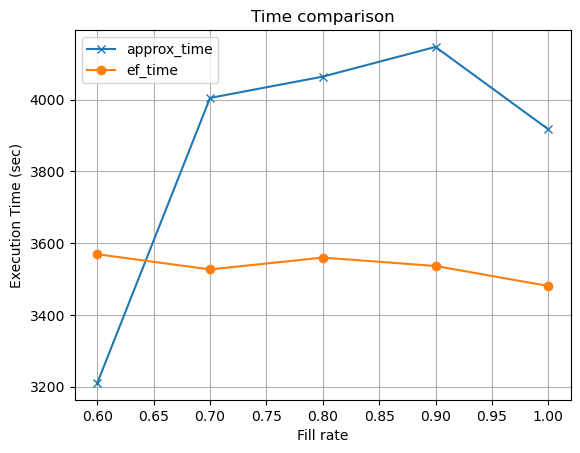

In [14]:
# Example data
x = [0.6, 0.7, 0.8, 0.9, 1.0]
y = [3568.96, 3526.67, 3559.59, 3536.24, 3480.61]
y2 = [3210.4423, 4004.41, 4063.84, 4146.57, 3917.15]
# Plotting
plt.plot(x, y2, marker='x', label='approx_time')
plt.plot(x, y, marker='o', label='ef_time')  # 'o' adds circular markers at data points
plt.title('Time comparison')
plt.xlabel('Fill rate')
plt.ylabel('Execution Time (sec)')
plt.grid(True)
plt.legend()
plt.show()

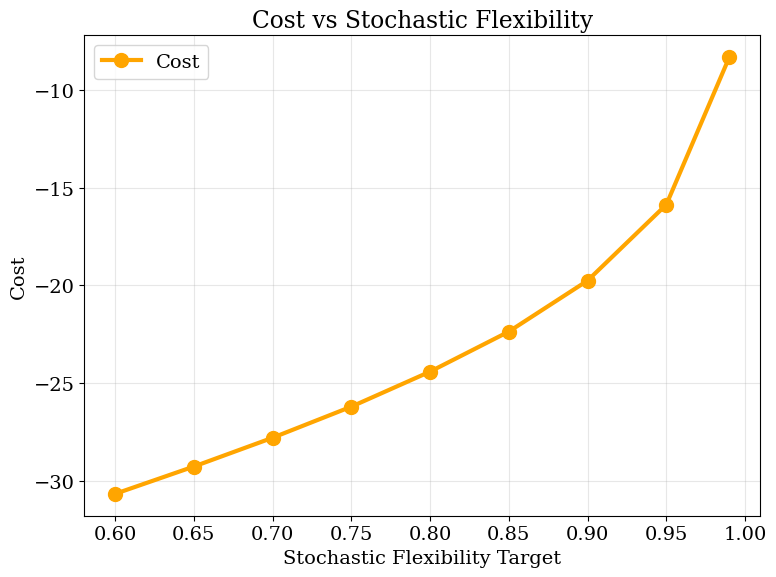

In [15]:
rc('font', **{'family': 'serif', 'size': 14})

fig, ax = plt.subplots(figsize = (8, 6))
# ax1 = ax.twinx()

# Example data
x = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
y = [-30.6412, -29.246609, -27.776438, -26.188941, -24.4002, -22.3556, -19.752614, -15.872507, -8.343411]
# y2 = [556280.48, 383540.86, 373214.82, 645751.8, 437765.47]
# Plotting
ax.plot(x, y, marker='o', label='Cost', color = 'orange', linewidth=3, markersize=10)  # 'o' adds circular markers at data points
# ax1.plot(x, y2, marker='x', label='approx_obj', color ='blue')
plt.title('Cost vs Stochastic Flexibility')
ax.set_ylabel('Cost')
# ax1.set_ylabel('Expected Cost (Approx.)')
ax.set_xlabel('Stochastic Flexibility Target')
plt.grid(alpha = 0.3)
# ax1.legend(loc='lower right')
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fname = 'sftar', dpi = 300)
plt.show()
plt.rcdefaults()

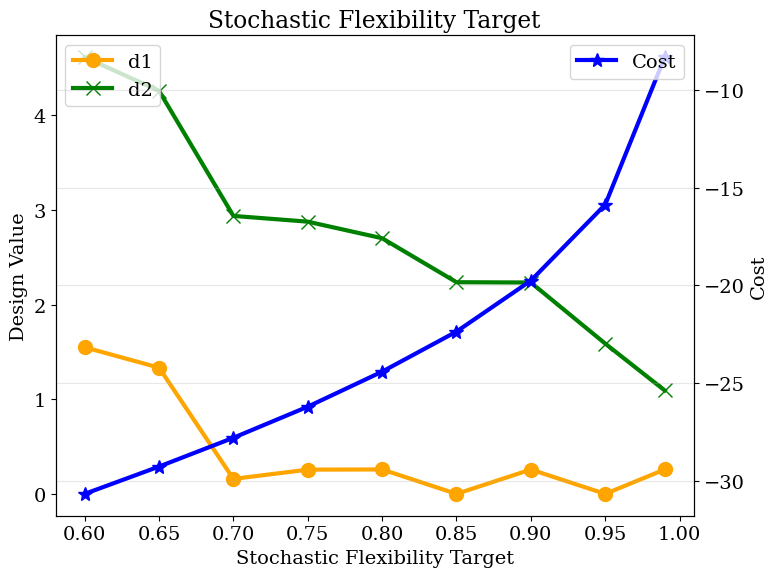

In [12]:
rc('font', **{'family': 'serif', 'size': 14})

fig, ax = plt.subplots(figsize = (8, 6))
ax1 = ax.twinx()

# Example data
x = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
y = [1.54826, 1.33306, 0.15822, 0.256112, 0.258016, 0, 0.2571558, 0, 0.25801]
y2 = [4.61239, 4.257221, 2.93587, 2.875006, 2.700017, 2.23556, 2.23241, 1.58725, 1.09235]
y3 = [-30.6412, -29.246609, -27.776438, -26.188941, -24.4002, -22.3556, -19.752614, -15.872507, -8.343411]
# Plotting
ax.plot(x, y, marker='o', label='d1', color = 'orange', linewidth=3, markersize=10)  # 'o' adds circular markers at data points
ax.plot(x, y2, marker='x', label='d2', color = 'green', linewidth=3, markersize=10)
ax1.plot(x, y3, marker='*', label='Cost', color ='blue', linewidth=3, markersize=10)
plt.title('Stochastic Flexibility Target')
ax.set_ylabel('Design Value')
ax1.set_ylabel('Cost')
ax.set_xlabel('Stochastic Flexibility Target')
plt.grid(alpha = 0.3)
ax1.legend(loc='upper right')
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(fname = 'sftar', dpi = 300)
plt.show()
plt.rcdefaults()